## Estimate the set from Racoons command:

### Step 1. Import the set

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

filename = '../data/raw/scraped_data.csv'

ds = pd.read_csv(filename,delimiter=',')

col = 'Url'  # Drop the column Url because it needn't for analysis
if col in ds.columns:
    ds.drop(columns=[col], inplace=True)

# Rename columns
ds.columns = ['property_id', 'locality', 'postal_code', 'price', 'property_type','property_subtype', 'sale_type','rooms', 'area','has_equipped_kitchen', 'is_furnished', 'has_open_fire','has_terrace','has_garden','facades_number', 'has_swimming_pool','state']



### See the head 

In [27]:
print( ds.shape )

pd.set_option('display.expand_frame_repr', False)
print( ds.head(5).transpose() )


(10947, 17)
                              0          1                2                3           4
property_id            RBU61383   RBU61403         RBU61404         RBU43493    RBU50579
locality                hoboken    merksem          wilrijk           deurne  borgerhout
postal_code                2660       2170             2610             2100        2140
price                    299000     439000           264000           329000      340000
property_type             house      house            house            house       house
property_subtype      residence  residence        residence        residence   residence
sale_type              standard   standard         standard         standard    standard
rooms                         3          4                2                4           2
area                        176        189              107              139         187
has_equipped_kitchen          0          0                0                0           0
is_furnis

### Description of columns 

In [10]:
print( ds.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10947 entries, 0 to 10946
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Property ID          10947 non-null  object 
 1   Locality name        10946 non-null  object 
 2   Postal code          10946 non-null  float64
 3   Price                10782 non-null  float64
 4   Type of property     10947 non-null  object 
 5   Subtype of property  10946 non-null  object 
 6   Type of sale         10947 non-null  object 
 7   Number of rooms      10659 non-null  float64
 8   Living area          9752 non-null   float64
 9   Equipped kitchen     10947 non-null  int64  
 10  Furnished            10947 non-null  int64  
 11  Open fire            10947 non-null  int64  
 12  Terrace              2490 non-null   float64
 13  Garden               1502 non-null   float64
 14  Number of facades    5805 non-null   float64
 15  Swimming pool        10947 non-null 

### Uniq values. 

In [12]:
print(ds.nunique())

print('\n\n')

print(ds['Type of property'].value_counts())
print('\n')
print(ds['Subtype of property'].value_counts())


Property ID            10947
Locality name            846
Postal code              646
Price                   1493
Type of property           2
Subtype of property       15
Type of sale               1
Number of rooms           26
Living area              547
Equipped kitchen           1
Furnished                  2
Open fire                  2
Terrace                  104
Garden                   466
Number of facades          4
Swimming pool              1
State of building          9
dtype: int64



Type of property
house        6049
apartment    4898
Name: count, dtype: int64


Subtype of property
residence         5078
apartment         4018
mixed-building     384
villa              365
duplex             226
studio             211
penthouse          195
ground-floor       181
master-house       121
cottage             45
loft                45
bungalow            40
triplex             21
mansion              9
chalet               7
Name: count, dtype: int64


### By subtypes: 

In [13]:
table = ds.groupby(['Type of property', 'Subtype of property']).size().reset_index(name='count')
print(table)

   Type of property Subtype of property  count
0         apartment           apartment   4018
1         apartment              duplex    226
2         apartment        ground-floor    181
3         apartment                loft     45
4         apartment           penthouse    195
5         apartment              studio    211
6         apartment             triplex     21
7             house            bungalow     40
8             house              chalet      7
9             house             cottage     45
10            house             mansion      9
11            house        master-house    121
12            house      mixed-building    384
13            house           residence   5078
14            house               villa    365


### rename columns. 

In [15]:
ds.columns = ['property_id', 'locality', 'postal_code', 'price', 'property_type','property_subtype', 'sale_type','rooms', 'area','has_equipped_kitchen', 'is_furnished', 'has_open_fire','has_terrace','has_garden','facades_number', 'has_swimming_pool','state']
print('\n\n','New names:')
print( ds.info() )



 New names:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10947 entries, 0 to 10946
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           10947 non-null  object 
 1   locality              10946 non-null  object 
 2   postal_code           10946 non-null  float64
 3   price                 10782 non-null  float64
 4   property_type         10947 non-null  object 
 5   property_subtype      10946 non-null  object 
 6   sale_type             10947 non-null  object 
 7   rooms                 10659 non-null  float64
 8   area                  9752 non-null   float64
 9   has_equipped_kitchen  10947 non-null  int64  
 10  is_furnished          10947 non-null  int64  
 11  has_open_fire         10947 non-null  int64  
 12  has_terrace           2490 non-null   float64
 13  has_garden            1502 non-null   float64
 14  facades_number        5805 non-null   float64
 15  has_s

### Step 8. 

In [16]:
print(ds['state'].value_counts())


state
Normal                2941
New                   1524
Excellent             1387
To be renovated       1148
To renovate            447
Fully renovated        325
To restore              13
Under construction       8
To demolish              6
Name: count, dtype: int64


### See distribution of price 

In [17]:
pd.set_option('display.float_format', '{:.0f}'.format)

print( ds['price'].describe() )

count      10782
mean      378101
std       448716
min            1
25%       209000
50%       299000
75%       429000
max     26000000
Name: price, dtype: float64


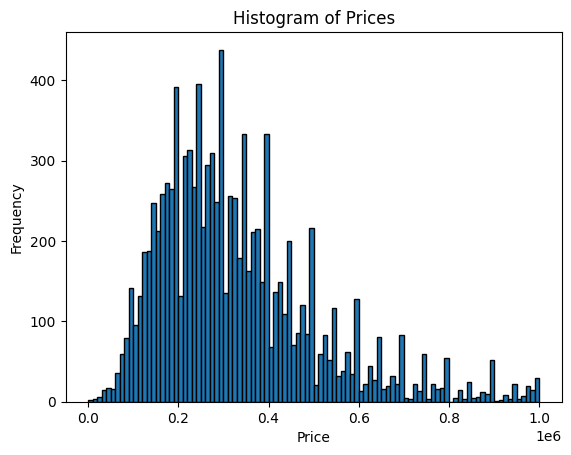

In [18]:
ds['price'].plot(kind='hist', bins=100, range=(1, 1e6), edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Prices')
plt.show()

### Modes. 

In [19]:
modes = ds['price'].mode()
print(modes)

0   299000
Name: price, dtype: float64


### Geopandas - build a clear map. 

<Axes: >

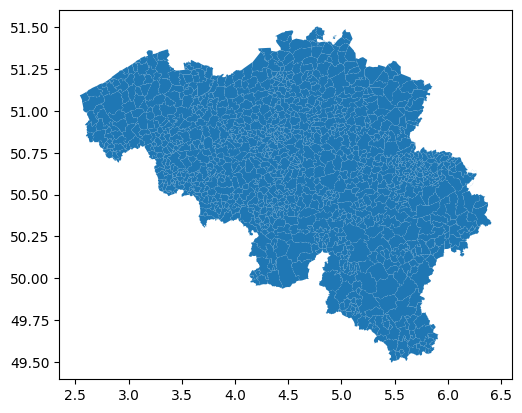

In [20]:
#  nouveau_PO

shp_name = '../shapefiles/Belgium-4-Digit-Postcodes-2020.shp'

gdf = gpd.read_file(shp_name)

gdf.plot()

In [21]:
ds_avg = ds.groupby('postal_code', as_index=False)['price'].median()
ds_avg.rename(columns={'price': 'median_price'}, inplace=True)
print(ds_avg)

     postal_code  median_price
0           1000        399000
1           1020        275000
2           1030        374500
3           1040        425000
4           1050        675000
..           ...           ...
641         9960        375000
642         9961       2498000
643         9968        398000
644         9970        327000
645         9990        490000

[646 rows x 2 columns]


### Bind geoshape and median price

In [22]:
#gdf['nouveau_PO'] = gdf['nouveau_PO'].astype(int)
#ds_avg['postal_code'] = ds_avg['postal_code'].astype(int)

gdf['nouveau_PO'] = pd.to_numeric(gdf['nouveau_PO'], errors='coerce').astype('Int64')
ds_avg['postal_code'] = pd.to_numeric(ds_avg['postal_code'], errors='coerce').astype('Int64')

gdf = gdf.merge(ds_avg, left_on='nouveau_PO', right_on='postal_code', how='left')

print (gdf.dtypes)


Join_Count         int32
nouveau_PO         Int64
FREQUENCY          int32
CP_speciau         int32
Shape_Leng       float64
Shape_Area       float64
geometry        geometry
postal_code        Int64
median_price     float64
dtype: object


### Build a color map of avg price 

Text(0.5, 1.0, 'Median Price by Postal Code in Belgium')

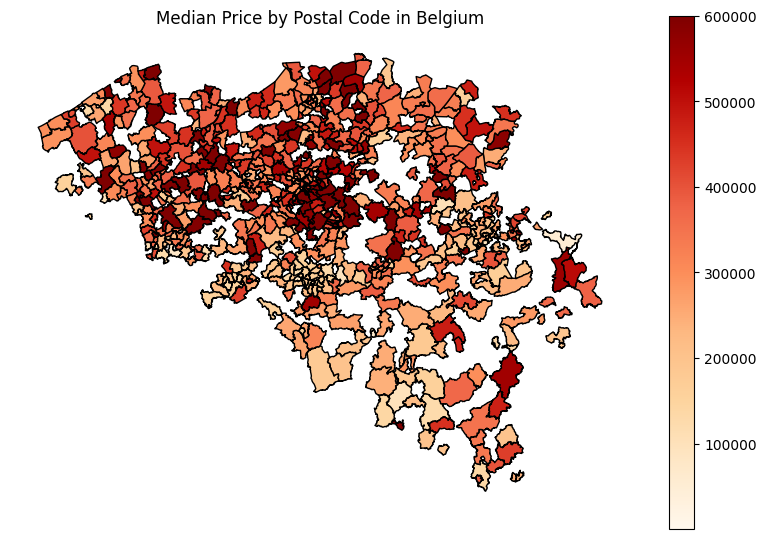

In [24]:
from matplotlib.colors import Normalize
norm = Normalize(vmin=100, vmax=600000)

width_px, height_px = 1500, 1000
dpi = 150
figsize = (width_px / dpi, height_px / dpi)
fig, ax = plt.subplots(figsize=figsize)


gdf.plot(
    cmap='OrRd', 
    column='median_price', 
    legend=True,
    norm=norm,
    ax=ax,
    edgecolor='black')

plt.axis('off')
plt.title('Median Price by Postal Code in Belgium')


### Save in file 

In [25]:
fig.savefig('belgium_median_price_map_goldfish.png', dpi=dpi, bbox_inches='tight')
plt.close(fig)